c:\workspace\IBM_Data_Engineer\Generative_AI_Elevate_your_Data_Engineering_Career\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


               Classifier  Accuracy
0     Logistic Regression  0.620690
1                     KNN  0.646552
2             Naive Bayes  0.577586
3          Decision Trees  0.603448
4          Random Forests  0.629310
5  Multi layer perceptron  0.620690


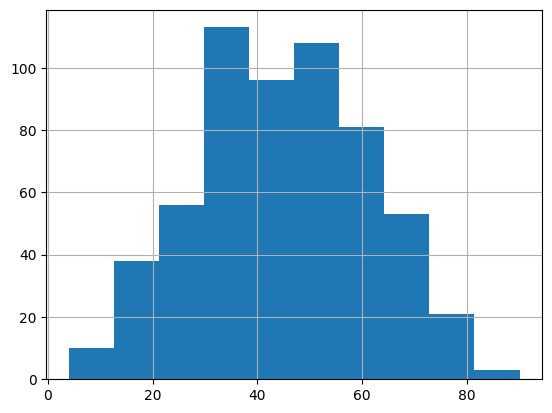

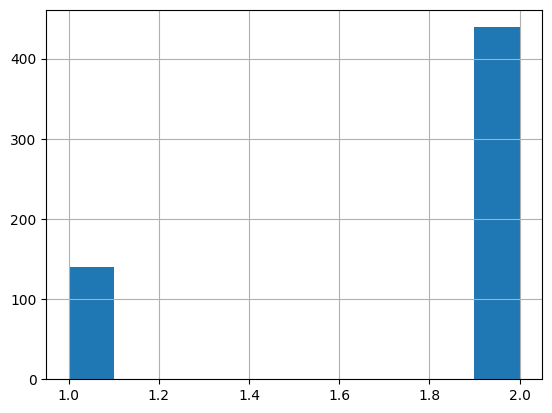

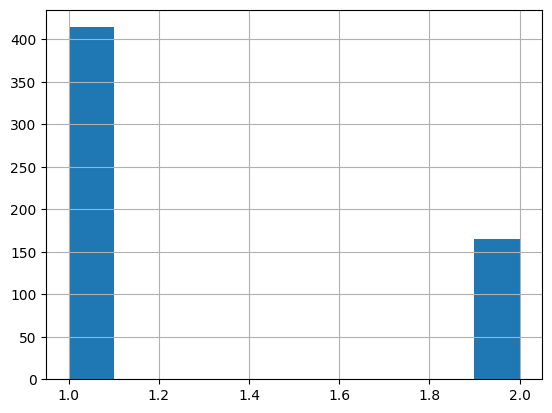

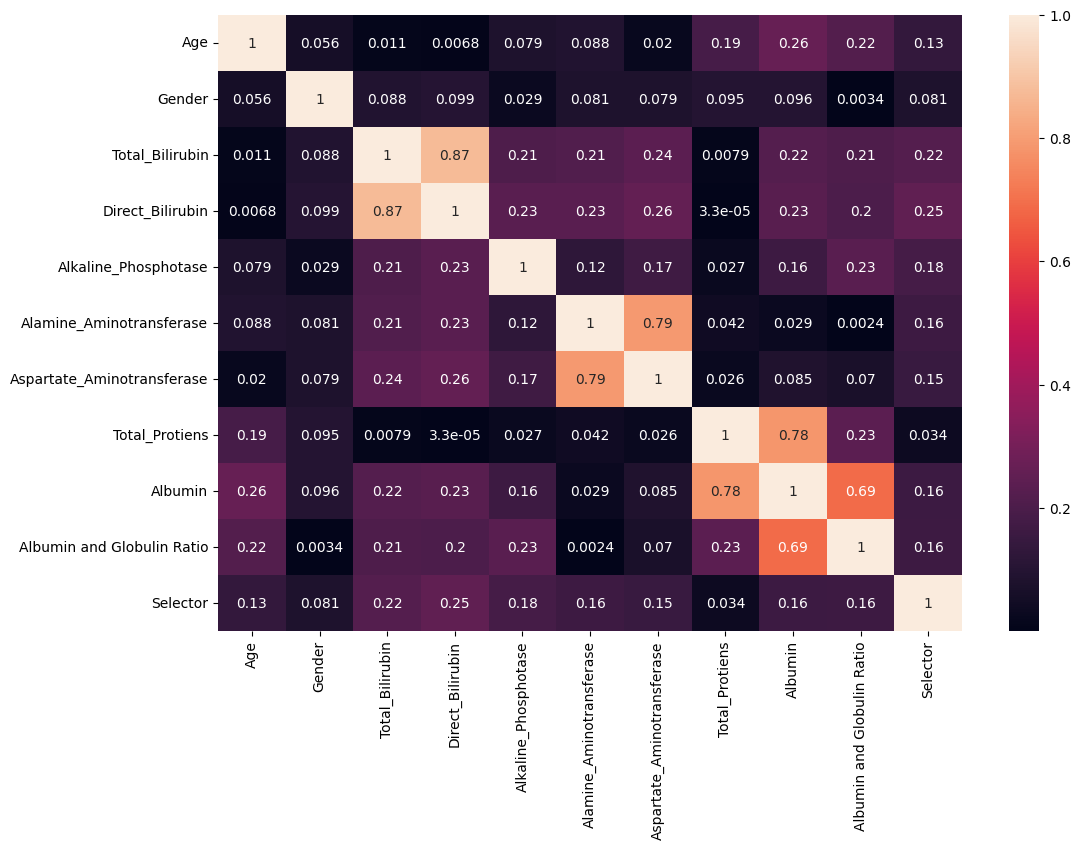

In [2]:
"""

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/ILPD.csv"

For a given data set available in a CSV format, write a python code that does the following:
1. Load the CSV data to a pandas data frame assuming the first row of the CSV contains the headers of the data.
2. Save an image to disk, containing histograms of the data distribution with respect to a continuous attribute 'Age' and discrete attributes 'Gender' and 'Selector'.
3. Save an image to disk containing the correlation heatmap of the data set.
4. Identify the top 5 features with highest absolute correlation with the attribute `Selector`.

"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the CSV data into a pandas data frame
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/ILPD.csv')

# Save histograms of data distribution for 'Age', 'Gender', and 'Selector'
plt.figure()
data['Age'].hist()
#plt.savefig('age_histogram.png')

plt.figure()
data['Gender'].hist()
#plt.savefig('gender_histogram.png')

plt.figure()
data['Selector'].hist()
#plt.savefig('selector_histogram.png')

# Save correlation heatmap of the data set
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(abs(corr), annot=True)
#plt.savefig('correlation_heatmap.png', bbox_inches='tight')

# Identify top 5 features with highest absolute correlation with 'Selector'
correlation_with_selector = corr['Selector'].abs().sort_values(ascending=False)
top_5_features = correlation_with_selector[1:6]  # Exclude 'Selector' itself
#print(top_5_features)

# Standard scaling on the top 5 attributes
scaler = StandardScaler()
top_5_attributes = data[top_5_features.index]
scaled_data = scaler.fit_transform(top_5_attributes)
scaled_data = pd.DataFrame(scaled_data, columns=top_5_attributes.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Selector'], test_size=0.2, random_state=42)

# Train and test classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'Multi layer perceptron': MLPClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Create DataFrame for the results
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print(results_df)